# Spin-up of CM2 and OM2

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
# import datetime as dt
import matplotlib.gridspec as gridspec

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34003,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:34117,Total threads: 4
Dashboard: /proxy/38261/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:37713,


In [3]:
# CM2 database
#session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/cj877/cj877.db') 
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'
expt_OM2_01  = '01deg_jra55v13_ryf9091'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

In [6]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [7]:
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

### Import data

In [8]:
# First 500 yr of CM2 
start_time_CM2 = '0001-01-01'
end_time_CM2   = '0500-12-31'

# First 500 yr of OM2
start_time_CM2 = '1900-01-01'
end_time_CM2   = '2399-12-31'

In [9]:
# Function to load annual means
def get_scalar_timeseries(expt, session, var, start_time, end_time, frequency):
    data = cc.querying.getvar(expt, var, session, start_time=start_time, end_time=end_time, frequency=frequency)
    data = data.sel(time=slice(start_time, end_time)).resample(time='Y').mean()
    data = data.load()
    
    return data

CM2-025

In [8]:
# CM2-025 data are saved as daily and it takes long to load, saved those therefore as *.nc 
SST_CM2_025    = xr.open_dataarray(path_to_data + 'temp_surface_ave_annual.nc')
SSS_CM2_025    = xr.open_dataarray(path_to_data + 'salt_surface_ave_annual_CM2_025.nc')
temp_CM2_025   = xr.open_dataarray(path_to_data + 'temp_global_ave_annual_CM2_025.nc')
ke_tot_CM2_025 = xr.open_dataarray(path_to_data + 'ke_tot_annual_CM2_025.nc')

In [ ]:
# SSS_CM2_025_end = cc.querying.getvar(expt=expt_CM2_025, variable='salt_surface_ave', session=session_CM2, frequency='1 daily', start_time='0402-01-31', end_time='0500-12-31')
# SSS_CM2_025_end = SSS_CM2_025_end.resample(time='Y').mean().load()
# SSS_new = xr.concat([SSS_CM2_025, SSS_CM2_025_end], dim='time')
# SSS_new.to_netcdf(path_to_data + 'salt_surface_ave_annual_CM2_025.nc')

In [ ]:
# temp_CM2_025_end = cc.querying.getvar(expt=expt_CM2_025, variable='temp_global_ave', session=session_CM2, frequency='1 daily', start_time='0402-01-31', end_time='0500-12-31')
# temp_CM2_025_end = temp_CM2_025_end.resample(time='Y').mean().load()
# temp_new = xr.concat([temp_CM2_025, temp_CM2_025_end], dim='time')
# temp_new.to_netcdf(path_to_data + 'temp_global_ave_annual_CM2_025.nc')

In [ ]:
# ke_tot_CM2_025_end = cc.querying.getvar(expt=expt_CM2_025, variable='ke_tot', session=session_CM2, frequency='1 daily', start_time='0402-01-31', end_time='0500-12-31')
# ke_tot_CM2_025_end = ke_tot_CM2_025_end.resample(time='Y').mean().load()
# ke_tot_new = xr.concat([ke_tot_CM2_025, ke_tot_CM2_025_end], dim='time')
# ke_tot_new.to_netcdf(path_to_data + 'ke_tot_annual_CM2_025.nc')

CM2-1

In [9]:
SST_CM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/temp_surface_ave_annual_CM2_1.nc')
SSS_CM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/salt_surface_ave_annual_CM2_1.nc')
temp_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/temp_global_ave_annual_CM2_1.nc')
ke_tot_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/ke_tot_annual_CM2_1.nc')

In [ ]:
# SSS_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='salt_surface_ave', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
# # SSS_CM2_1 = SSS_CM2_1.sel(time=slice(start_time_CM2, '0002-12-31')).resample(time='Y').mean()
# SSS_CM2_1 = SSS_CM2_1.resample(time='Y').mean()
# SSS_CM2_1 = SSS_CM2_1.load()
# SSS_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/salt_surface_ave_annual_CM2_1.nc')

In [ ]:
# temp_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='temp_global_ave', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
# temp_CM2_1 = temp_CM2_1.resample(time='Y').mean().load()
# temp_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/temp_global_ave_annual_CM2_1.nc')

In [ ]:
# ke_tot_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='ke_tot', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
# ke_tot_CM2_1 = ke_tot_CM2_1.resample(time='Y').mean().load()
# ke_tot_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/ke_tot_annual_CM2_1.nc')

OM2-025

In [10]:
SST_OM2_025    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/temp_surface_ave_annual_OM2_025.nc')
SSS_OM2_025    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/salt_surface_ave_annual_OM2_025.nc')
temp_OM2_025   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/temp_global_ave_annual_OM2_025.nc')
ke_tot_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/ke_tot_annual_OM2_025.nc')

In [ ]:
# SSS_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='salt_surface_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
# SSS_OM2_025 = SSS_OM2_025.resample(time='Y').mean().load()
# SSS_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/salt_surface_ave_annual_OM2_025.nc')

In [ ]:
# temp_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='temp_global_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
# temp_OM2_025 = temp_OM2_025.resample(time='Y').mean().load()
# temp_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/temp_global_ave_annual_OM2_025.nc')

In [ ]:
# ke_tot_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='ke_tot', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
# ke_tot_OM2_025 = ke_tot_OM2_025.resample(time='Y').mean().load()
# ke_tot_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/ke_tot_annual_OM2_025.nc')

OM2-1

In [11]:
SST_OM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/temp_surface_ave_annual_OM2_1.nc')
SSS_OM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/salt_surface_ave_annual_OM2_1.nc')
temp_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/temp_global_ave_annual_OM2_1.nc')
ke_tot_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/ke_tot_annual_OM2_1.nc')

In [ ]:
# SSS_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='salt_surface_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
# SSS_OM2_1 = SSS_OM2_1.resample(time='Y').mean().load()
# SSS_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/salt_surface_ave_annual_OM2_1.nc')

In [ ]:
# temp_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='temp_global_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
# temp_OM2_1 = temp_OM2_1.resample(time='Y').mean().load()
# temp_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/temp_global_ave_annual_OM2_1.nc')

In [ ]:
# ke_tot_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='ke_tot', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
# ke_tot_OM2_1 = ke_tot_OM2_1.resample(time='Y').mean().load()
# ke_tot_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/ke_tot_annual_OM2_1.nc')

Time-mean over years 400-500

In [42]:
print('')
print('CM2-025')
print('SST:', np.round(SST_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('SSS:', np.round(SSS_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('temp:', np.round(temp_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))

print('')
print('CM2-1')
print('SST:', np.round(SST_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('SSS:', np.round(SSS_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('temp:', np.round(temp_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))

print('')
print('OM2-025')
print('SST:', np.round(SST_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('SSS:', np.round(SSS_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('temp:', np.round(temp_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))

print('')
print('OM2-1')
print('SST:', np.round(SST_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('SSS:', np.round(SSS_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('temp:', np.round(temp_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))


CM2-025
SST: 18.74
SSS: 34.22
temp: 4.22
ke: 2616.82

CM2-1
SST: 18.41
SSS: 34.35
temp: 4.72
ke: 1033.54

OM2-025
SST: 18.11
SSS: 34.64
temp: 3.98
ke: 1899.51

OM2-1
SST: 18.14
SSS: 34.76
temp: 3.61
ke: 689.48


Year 400-500 average minus year 1 average

In [41]:
print('')
print('CM2-025')
print('SST:', np.round(SST_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values - SST_CM2_025[0,0].values, 2))
print('SSS:', np.round(SSS_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values - SSS_CM2_025[0,0].values, 2))
print('temp:', np.round(temp_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values - temp_CM2_025[0,0].values, 2))
print('ke:', np.round(ke_tot_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values - ke_tot_CM2_025[0,0].values, 2))

print('')
print('CM2-1')
print('SST:', np.round(SST_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values - SST_CM2_1[0,0].values, 2))
print('SSS:', np.round(SSS_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values - SSS_CM2_1[0,0].values, 2))
print('temp:', np.round(temp_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values - temp_CM2_1[0,0].values, 2))
print('ke:', np.round(ke_tot_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values - ke_tot_CM2_1[0,0].values, 2))

print('')
print('OM2-025')
print('SST:', np.round(SST_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values - SST_OM2_025[0,0].values, 2))
print('SSS:', np.round(SSS_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values - SSS_OM2_025[0,0].values, 2))
print('temp:', np.round(temp_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values - temp_OM2_025[0,0].values, 2))
print('ke:', np.round(ke_tot_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values - ke_tot_OM2_025[0,0].values, 2))

print('')
print('OM2-1')
print('SST:', np.round(SST_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values - SST_OM2_1[0,0].values, 2))
print('SSS:', np.round(SSS_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values - SSS_OM2_1[0,0].values, 2))
print('temp:', np.round(temp_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values - temp_OM2_1[0,0].values, 2))
print('ke:', np.round(ke_tot_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values - ke_tot_OM2_1[0,0].values, 2))


CM2-025
SST: 0.28
SSS: -0.42
temp: 0.61
ke: 843.28

CM2-1
SST: 0.14
SSS: -0.37
temp: 1.03
ke: 153.96

OM2-025
SST: -0.0
SSS: -0.0
temp: 0.34
ke: 46.89

OM2-1
SST: -0.03
SSS: 0.08
temp: -0.05
ke: -85.59


### Plotting

In [12]:
time = np.arange(1, 501, 1)

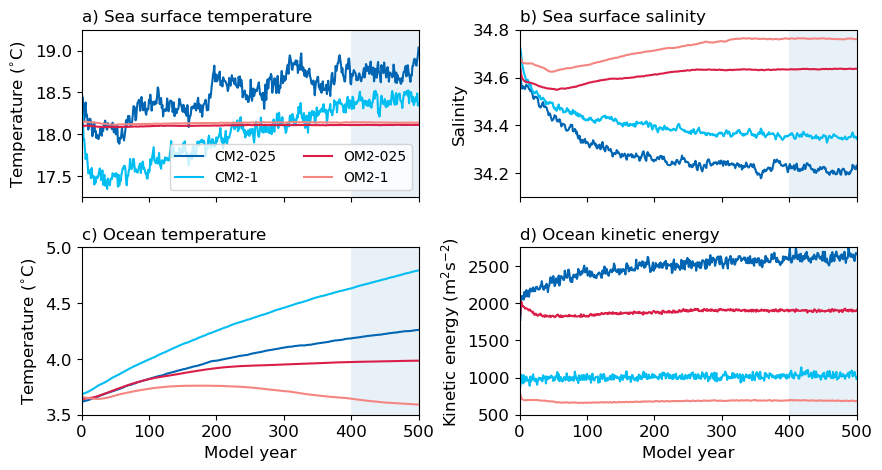

In [99]:
fig = plt.figure(figsize=(10,5))
gs  = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.3, wspace=0.3)

ax = fig.add_subplot(gs[0,0])
plt.plot(time, SST_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, SST_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, SST_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, SST_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.legend(ncol=2, fontsize=ft_size-2)
plt.title('')
plt.title('a) Sea surface temperature', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlim(0, 500)
plt.ylim(17.25, 19.25)
plt.yticks(np.arange(17.5, 19.25, 0.5))
plt.tick_params(labelbottom=False)
# plt.axvline(400, linestyle='--', color='k')
plt.fill_between([400, 500], [17.25, 17.25], [19.25, 19.25], alpha=0.1)

ax = fig.add_subplot(gs[0,1])
plt.plot(time, SSS_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, SSS_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, SSS_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, SSS_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('b) Sea surface salinity', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Salinity')
plt.xlim(0, 500)
plt.ylim(34.1, 34.8)
plt.yticks(np.arange(34.2, 35, 0.2))
plt.tick_params(labelbottom=False)
plt.fill_between([400, 500], [34.1, 34.1], [34.8, 34.8], alpha=0.1)

ax = fig.add_subplot(gs[1,0])
plt.plot(time, temp_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, temp_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, temp_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, temp_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('c) Ocean temperature', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlim(0, 500)
plt.ylim(3.5, 5)
plt.yticks(np.arange(3.5, 5.25, 0.5))
plt.fill_between([400, 500], [3.5, 3.5], [5, 5], alpha=0.1)

ax = fig.add_subplot(gs[1,1])
plt.plot(time, ke_tot_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, ke_tot_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, ke_tot_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, ke_tot_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('d) Ocean kinetic energy', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Kinetic energy (m$^2$s$^{-2}$)')
plt.xlim(0, 500)
plt.ylim(500, 2750)
plt.yticks(np.arange(500, 2750, 500))
plt.fill_between([400, 500], [500, 500], [2750, 2750], alpha=0.1);

save_flag = 0
if save_flag == 1:
    plt.savefig(fig_path + 'Fig_spinup_SST_SSS_temp_ke.png', dpi=300);

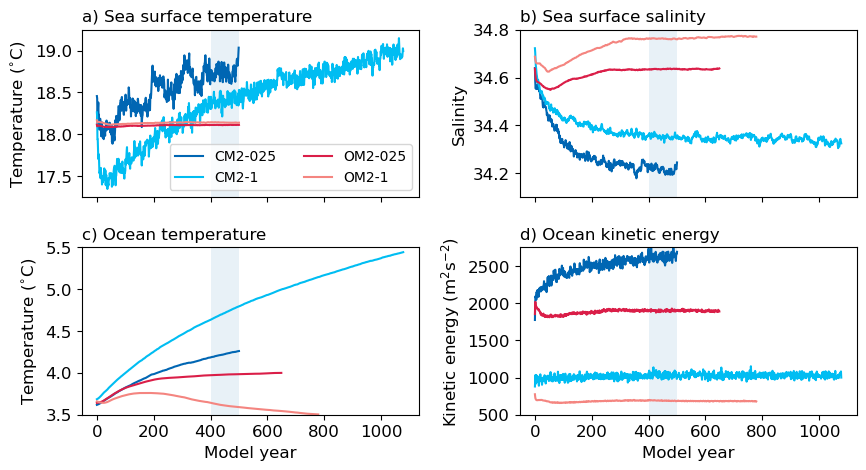

In [110]:
fig = plt.figure(figsize=(10,5))
gs  = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.3, wspace=0.3)

ax = fig.add_subplot(gs[0,0])
plt.plot(np.arange(0, len(SST_CM2_025.time), 1), SST_CM2_025, label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(np.arange(0, len(SST_CM2_1.time), 1), SST_CM2_1, label='CM2-1', color=CLEX_SkyBlue)
plt.plot(np.arange(0, len(SST_OM2_025.time), 1), SST_OM2_025, label='OM2-025', color=CLEX_Red)
plt.plot(np.arange(0, len(SST_OM2_1.time), 1), SST_OM2_1, label='OM2-1', color=CLEX_Pink)
plt.legend(ncol=2, fontsize=ft_size-2)
plt.title('')
plt.title('a) Sea surface temperature', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$C)')
# plt.xlim(0, 500)
plt.ylim(17.25, 19.25)
plt.yticks(np.arange(17.5, 19.25, 0.5))
plt.tick_params(labelbottom=False)
# plt.axvline(400, linestyle='--', color='k')
plt.fill_between([400, 500], [17.25, 17.25], [19.25, 19.25], alpha=0.1)

ax = fig.add_subplot(gs[0,1])
plt.plot(np.arange(0, len(SSS_CM2_025.time), 1), SSS_CM2_025, label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(np.arange(0, len(SSS_CM2_1.time), 1), SSS_CM2_1, label='CM2-1', color=CLEX_SkyBlue)
plt.plot(np.arange(0, len(SSS_OM2_025.time), 1), SSS_OM2_025, label='OM2-025', color=CLEX_Red)
plt.plot(np.arange(0, len(SSS_OM2_1.time), 1), SSS_OM2_1, label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('b) Sea surface salinity', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Salinity')
# plt.xlim(0, 500)
plt.ylim(34.1, 34.8)
plt.yticks(np.arange(34.2, 35, 0.2))
plt.tick_params(labelbottom=False)
plt.fill_between([400, 500], [34.1, 34.1], [34.8, 34.8], alpha=0.1)

ax = fig.add_subplot(gs[1,0])
plt.plot(np.arange(0, len(temp_CM2_025.time), 1), temp_CM2_025, label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(np.arange(0, len(temp_CM2_1.time), 1), temp_CM2_1, label='CM2-1', color=CLEX_SkyBlue)
plt.plot(np.arange(0, len(temp_OM2_025.time), 1), temp_OM2_025, label='OM2-025', color=CLEX_Red)
plt.plot(np.arange(0, len(temp_OM2_1.time), 1), temp_OM2_1, label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('c) Ocean temperature', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Temperature ($^{\circ}$C)')
# plt.xlim(0, 500)
plt.ylim(3.5, 5.5)
plt.yticks(np.arange(3.5, 5.75, 0.5))
plt.fill_between([400, 500], [3.5, 3.5], [5.5, 5.5], alpha=0.1)

ax = fig.add_subplot(gs[1,1])
plt.plot(np.arange(0, len(ke_tot_CM2_025.time), 1), ke_tot_CM2_025, label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(np.arange(0, len(ke_tot_CM2_1.time), 1), ke_tot_CM2_1, label='CM2-1', color=CLEX_SkyBlue)
plt.plot(np.arange(0, len(ke_tot_OM2_025.time), 1), ke_tot_OM2_025, label='OM2-025', color=CLEX_Red)
plt.plot(np.arange(0, len(ke_tot_OM2_1.time), 1), ke_tot_OM2_1, label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('d) Ocean kinetic energy', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Kinetic energy (m$^2$s$^{-2}$)')
# plt.xlim(0, 500)
plt.ylim(500, 2750)
plt.yticks(np.arange(500, 2750, 500))
plt.fill_between([400, 500], [500, 500], [2750, 2750], alpha=0.1);

save_flag = 0
if save_flag == 1:
    plt.savefig(fig_path + 'Fig_spinup_SST_SSS_temp_ke_full_length.png', dpi=300);